In [1]:
# Import packages from Python standard library
import numpy as np
import pandas as pd
import re
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Data

In [2]:
#Data including zeros
branches = pd.read_csv('../can-summer-2023/data/clean/branch_metrics.csv')
    #Fill NaN with 0
branches['COMPUTER_SESSIONS'] = branches['COMPUTER_SESSIONS'].fillna(0)
branches['VISITORS'] = branches['VISITORS'].fillna(0)

In [3]:
branches.head()

,BRANCH,YEAR,MONTH,CIRCULATION,COMPUTER_SESSIONS,VISITORS
0,Albany Park,2011,1,8427.0,1666.0,9604.0
1,Albany Park,2011,2,7023.0,1296.0,10500.0
2,Albany Park,2011,3,9702.0,1735.0,9050.0
3,Albany Park,2011,4,9344.0,1841.0,9300.0
4,Albany Park,2011,5,8865.0,1683.0,8271.0


In [4]:
#Data not including zeros
branches_nonzero = branches[(branches['VISITORS'] > 0) & (branches['COMPUTER_SESSIONS'] > 0)]
    #Locating a list of branches where the computer sessions > visitors
#branches_sessions = branches_nonzero.loc[(branches_nonzero['COMPUTER_SESSIONS']) >= branches_nonzero['VISITORS']]
#branches_sessions

In [5]:
branches_nonzero.head()

,BRANCH,YEAR,MONTH,CIRCULATION,COMPUTER_SESSIONS,VISITORS
0,Albany Park,2011,1,8427.0,1666.0,9604.0
1,Albany Park,2011,2,7023.0,1296.0,10500.0
2,Albany Park,2011,3,9702.0,1735.0,9050.0
3,Albany Park,2011,4,9344.0,1841.0,9300.0
4,Albany Park,2011,5,8865.0,1683.0,8271.0


## Comparsion of %'s of Computer Sessions / Visitors: INCLUDING ZEROS

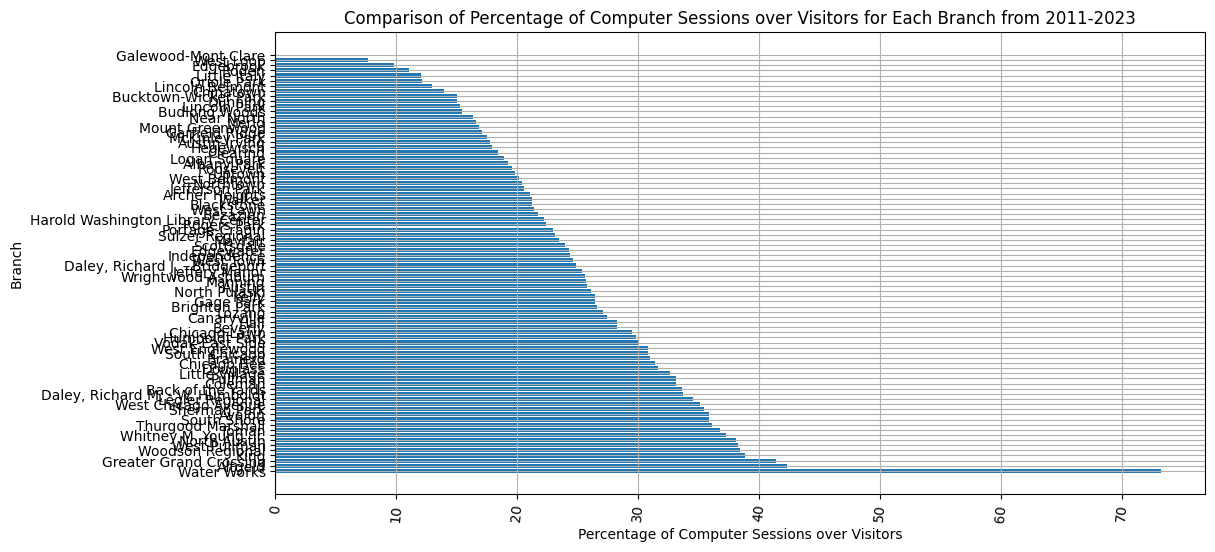

In [6]:
# Calculate the sum of Computer Sessions and sum of Visitors from all years
branch_metrics = branches.groupby('BRANCH').agg({'COMPUTER_SESSIONS': 'sum', 'VISITORS': 'sum'})

# Adding a column that calculates the Computer Session Percentage (computer sessions/visitors)*100
branch_metrics['COMPUTER_SESSION_PERCENTAGE'] = (branch_metrics['COMPUTER_SESSIONS'] / branch_metrics['VISITORS']) * 100

# Sort percentages of Computer Sessions from greatest to least
branch_metrics_sorted = branch_metrics.sort_values('COMPUTER_SESSION_PERCENTAGE', ascending=False)

# Plot 
plt.figure(figsize=(12, 6))
plt.barh(branch_metrics_sorted.index, branch_metrics_sorted['COMPUTER_SESSION_PERCENTAGE'])
plt.xlabel('Percentage of Computer Sessions over Visitors')
plt.ylabel('Branch')
plt.title('Comparison of Percentage of Computer Sessions over Visitors for Each Branch from 2011-2023')
plt.xticks(rotation=85)
plt.grid(True)
plt.show()

Explanation For Above Graph:
- This graph sums up all of the Computer Sessions and sums up the Visitors from each branch for all years.
- Then, it creates a new column that displays the values when dividing (sum of Computer Sessions/sum of Visitors)*100 and sorts them from greatest to least

## Comparsion of %'s of Computer Sessions / Visitors: NONZERO

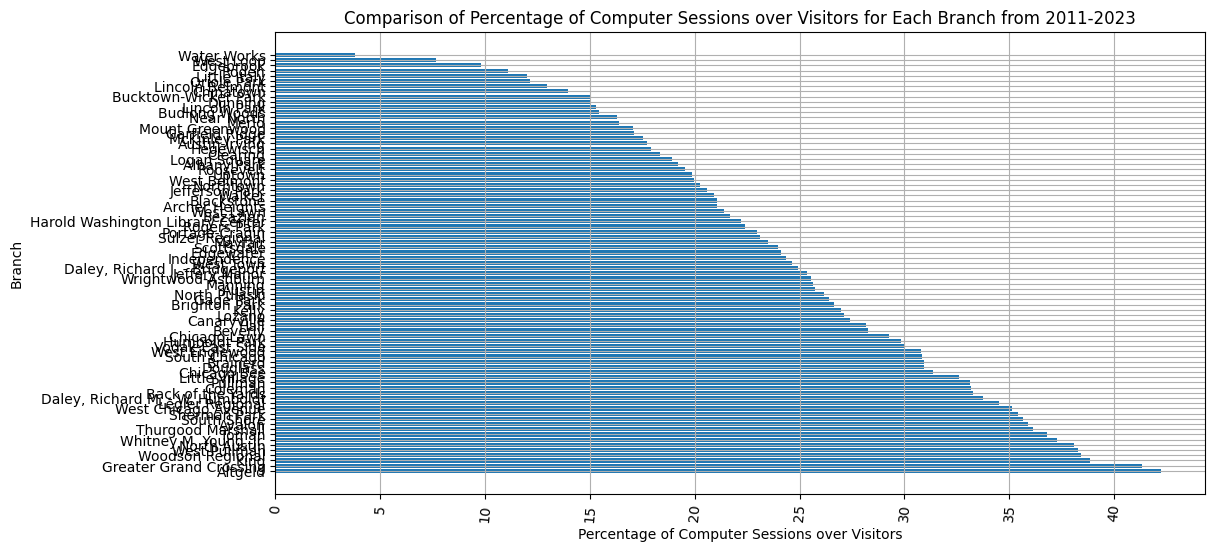

In [16]:
# Calculate the sum of Computer Sessions and sum of Visitors from all years
branch_metrics2 = branches_nonzero.groupby('BRANCH').agg({'COMPUTER_SESSIONS': 'sum', 'VISITORS': 'sum'})

# Adding a column that calculates the Computer Session Percentage (computer sessions/visitors)*100
branch_metrics2['COMPUTER_SESSION_PERCENTAGE'] = (branch_metrics2['COMPUTER_SESSIONS'] / branch_metrics2['VISITORS'])* 100

# Sort percentages of Computer Sessions from greatest to least
branch_metrics_sorted = branch_metrics2.sort_values('COMPUTER_SESSION_PERCENTAGE', ascending=False)

# Plot 
plt.figure(figsize=(12, 6))
plt.barh(branch_metrics_sorted.index, branch_metrics_sorted['COMPUTER_SESSION_PERCENTAGE'])
plt.xlabel('Percentage of Computer Sessions over Visitors')
plt.ylabel('Branch')
plt.title('Comparison of Percentage of Computer Sessions over Visitors for Each Branch from 2011-2023')
plt.xticks(rotation=85)
plt.grid(True)
plt.show()

### What I Noticed:

- In the Zero's graph, Water Works is significantly higher
- In the Nonzeros, Altgeld is the highest, but still much less than Water Works

**Because some of the percentages become over 100% when plotting the below graphs, I have changed to using ratios**

## Ratio Describing Average Computer Session per Visitor

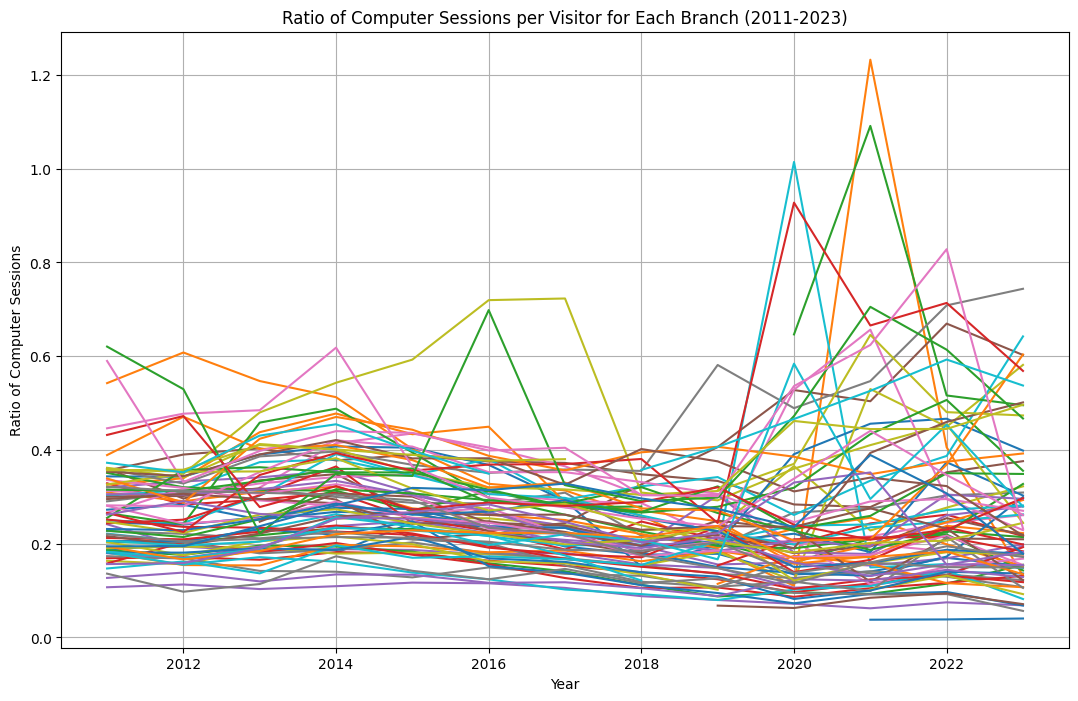

In [67]:
# New Dataframe with all branches that includes the "Computer Session Percentage" column
branches_cp = branches_nonzero.copy()
branches_cp['COMPUTER_SESSIONS_PERCENTAGE'] = (branches_nonzero['COMPUTER_SESSIONS'] / branches_nonzero['VISITORS'])
#branches_cp_sorted = branches_cp.sort_values('COMPUTER_SESSIONS_PERCENTAGE', ascending=False)
#branches_cp_sorted

branches_groupby = branches_cp.groupby(['BRANCH', 'YEAR'])['COMPUTER_SESSIONS_PERCENTAGE'].mean().unstack()
plt.figure(figsize=(13, 8))
for branch in branches_groupby.index:
    plt.plot(branches_groupby.columns, branches_groupby.loc[branch], label=branch)
plt.xlabel('Year')
plt.ylabel('Ratio of Computer Sessions')
plt.title('Ratio of Computer Sessions per Visitor for Each Branch (2011-2023)')
#plt.legend()
plt.grid(True)
plt.show()

## Examining Outlier Branches: Spiked During 2019-2022

### Looking at Altgeld:

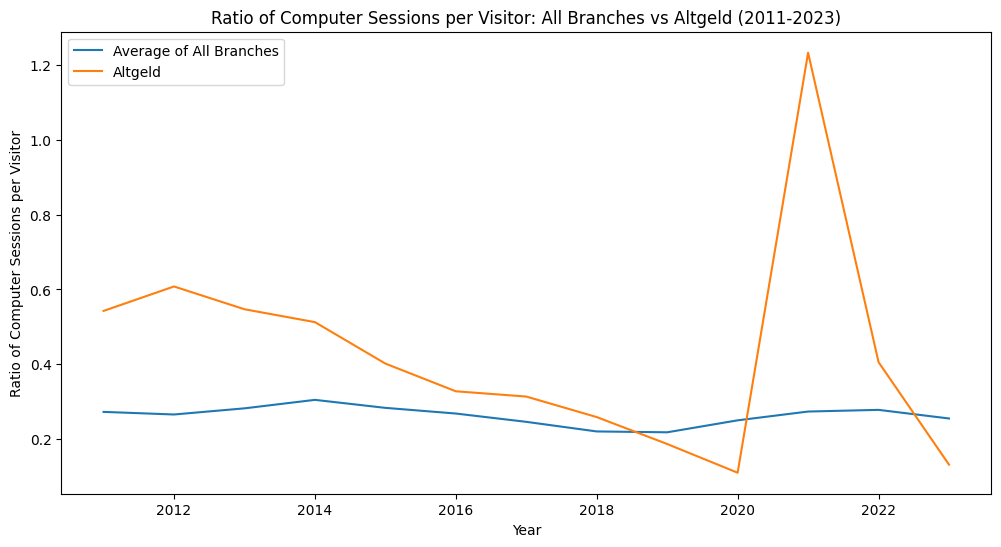

In [65]:
#Selected branch
branch_name = 'Altgeld'

#Average of each column using DataFrame.mean()
avg_col_branches = branches_groupby.mean(axis=0)
avg_col_branches

#Extracting specific branch
selected_branch = branches_groupby.loc[branch_name]

plt.figure(figsize=(12,6))
plt.plot(avg_col_branches, label='Average of All Branches')
plt.plot(selected_branch, label=branch_name)
plt.xlabel('Year')
plt.ylabel('Ratio of Computer Sessions per Visitor')
plt.title(f'Ratio of Computer Sessions per Visitor: All Branches vs {branch_name} (2011-2023)')
plt.legend()
plt.show()

#### Examining the Altgeld Dataframe

What would make the jump from 2020 to 2021 look so drastic?

In [56]:
#Breaking down month by month for 2020
altgeld_2020 = branches_nonzero.loc[((branches_nonzero['BRANCH']) == 'Altgeld') & ((branches_nonzero['YEAR'] == 2020))]
altgeld_2020

,BRANCH,YEAR,MONTH,CIRCULATION,COMPUTER_SESSIONS,VISITORS
256,Altgeld,2020,1,360.0,258.0,2730.0
257,Altgeld,2020,2,271.0,249.0,1809.0
258,Altgeld,2020,3,148.0,111.0,1127.0


The rest of Altgeld after 3-2020 is not shown because the dataset branches_nonzero does not include data when the Computer Sessions and Visitors were 0. 

In [54]:
#Breaking down month by month for 2021
altgeld_2021 = branches_nonzero.loc[((branches_nonzero['BRANCH']) == 'Altgeld') & ((branches_nonzero['YEAR'] == 2021))]
altgeld_2021

,BRANCH,YEAR,MONTH,CIRCULATION,COMPUTER_SESSIONS,VISITORS
268,Altgeld,2021,1,127.0,151.0,339.0
269,Altgeld,2021,2,81.0,114.0,270.0
270,Altgeld,2021,3,156.0,250.0,412.0
271,Altgeld,2021,4,173.0,305.0,470.0
272,Altgeld,2021,5,146.0,400.0,724.0
273,Altgeld,2021,6,153.0,680.0,998.0
274,Altgeld,2021,7,206.0,747.0,1437.0
275,Altgeld,2021,8,248.0,970.0,1397.0
276,Altgeld,2021,9,171.0,818.0,162.0
277,Altgeld,2021,10,146.0,681.0,155.0


**Conclusion:** Prior to 2021, there were many more visitors-- but they were using the computers less in comparsion to the visitors in 2021! The above graph, it especially shows in months 7&8 that there were far more computer sessions than visitors. This would then show why the ratio was so high--each visitor was having more sessions than prior to 2021.
- So why were more computer sessions occuring per visitor? Less access to computers/internet at home duirng this time?

### Looking at Douglass:

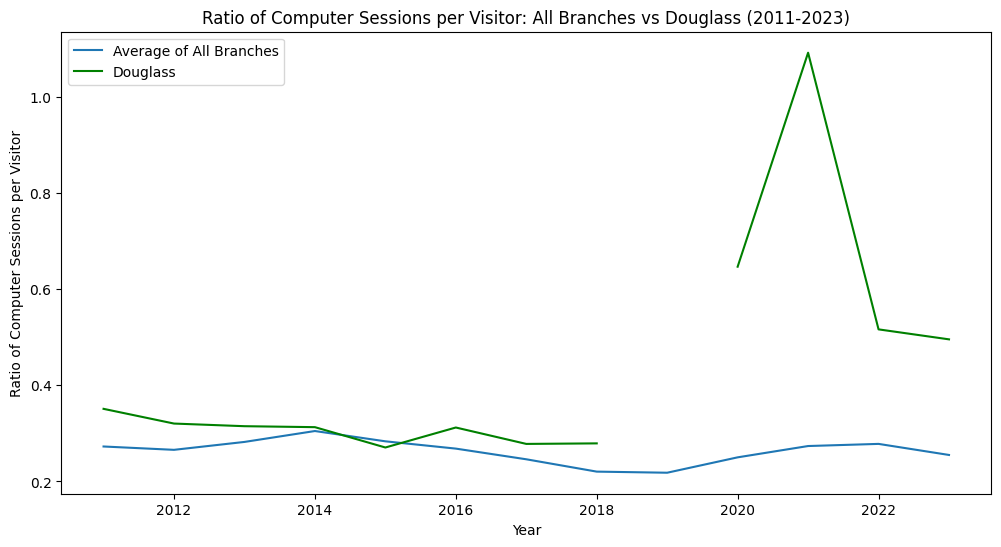

In [47]:
#Selected branch
branch_name = 'Douglass'

#Average of each column using DataFrame.mean()
avg_col_branches = branches_groupby.mean(axis=0)
avg_col_branches

#Extracting specific branch
selected_branch = branches_groupby.loc[branch_name]

plt.figure(figsize=(12,6))
plt.plot(avg_col_branches, label='Average of All Branches')
plt.plot(selected_branch, label=branch_name, color='green')
plt.xlabel('Year')
plt.ylabel('Ratio of Computer Sessions per Visitor')
plt.title(f'Ratio of Computer Sessions per Visitor: All Branches vs {branch_name} (2011-2023)')
plt.legend()
plt.show()

*This plot does not include zeros

#### Examining the Douglass Dataframe

**Gap in graph:**

In [48]:
selected_branch # Douglass is NaN for 2019-- why?

YEAR
2011    0.350992
2012    0.320403
2013    0.314922
2014    0.312922
2015    0.270646
2016    0.312195
2017    0.278100
2018    0.279212
2019         NaN
2020    0.646408
2021    1.091171
2022    0.516173
2023    0.495422
Name: Douglass, dtype: float64

In [49]:
douglass_2019 = branches_nonzero.loc[((branches_nonzero['BRANCH']) == 'Douglass') & ((branches_nonzero['YEAR'] == 2019))]
douglass_2019

,BRANCH,YEAR,MONTH,CIRCULATION,COMPUTER_SESSIONS,VISITORS


**Conclusion:** This DataFrame comes from branches_nonzero, which excludes any values of 0 in the Computer Session and Visitors columns. From 10-2018 to 10-2019, Douglass had 0 Computer Sessions and Visitors. Thus, I assume the gap in the plot for Douglass is because the dataset excludes values of 0. This can also be seen above, as douglass_2019 does not have any data for 2019. The gap is then exemplified as NaN

The spike in this graph during 2021 could be explained with the same reasoning for the spike in the Altgeld graph. More computer sessions per visitor in 2021, in comparison to prior years.

Additionally, for this branch, it shows that the ratio of computer sessions per visitor are still higher in 2022-beyond (roughly around 0.5). The years prior to COVID were below 0.4. Are people needing access to computers in libraries now more than ever? Was COVID the reason for this? 

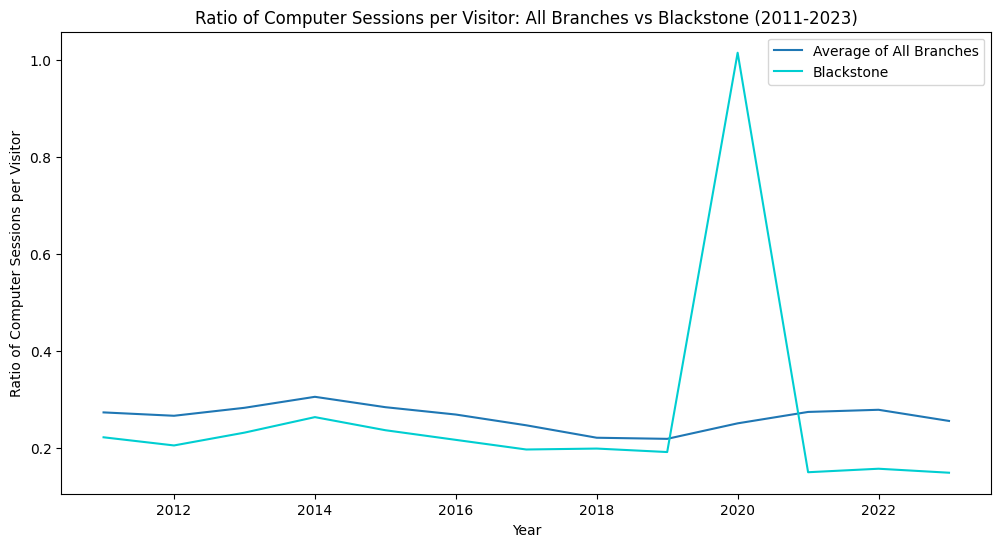

In [50]:
#Selected branch
branch_name = 'Blackstone'

#Average of each column using DataFrame.mean()
avg_col_branches = branches_groupby.mean(axis=0)
avg_col_branches

#Extracting specific branch
selected_branch = branches_groupby.loc[branch_name]

plt.figure(figsize=(12,6))
plt.plot(avg_col_branches, label='Average of All Branches')
plt.plot(selected_branch, label=branch_name, color='darkturquoise')
plt.xlabel('Year')
plt.ylabel('Ratio of Computer Sessions per Visitor')
plt.title(f'Ratio of Computer Sessions per Visitor: All Branches vs {branch_name} (2011-2023)')
plt.legend()
plt.show()

#### Examining the Blackstone Dataframe

## Examining Outlier Branches: Spiked During 2015 to 2018

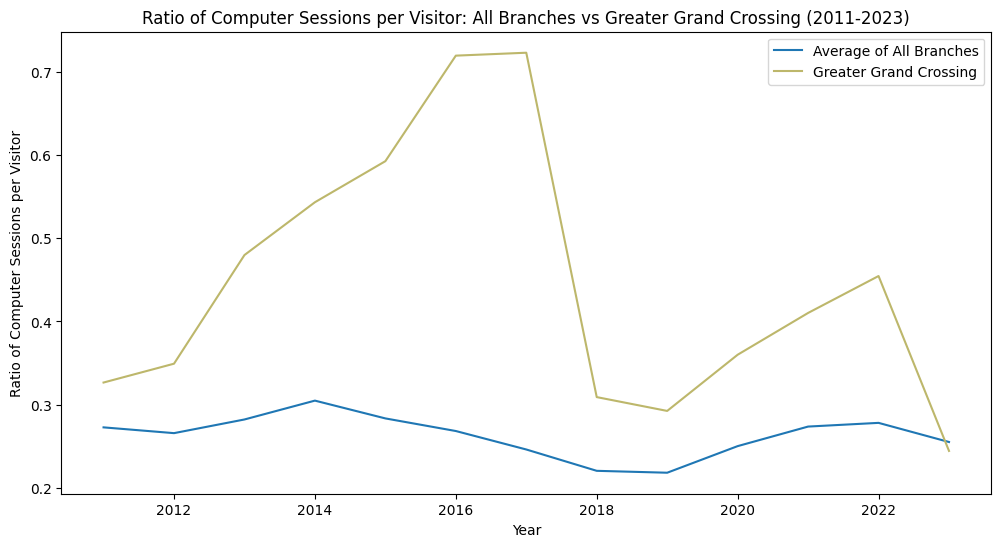

In [51]:
#Selected branch
branch_name = 'Greater Grand Crossing'

#Average of each column using DataFrame.mean()
avg_col_branches = branches_groupby.mean(axis=0)
avg_col_branches

#Extracting specific branch
selected_branch = branches_groupby.loc[branch_name]

plt.figure(figsize=(12,6))
plt.plot(avg_col_branches, label='Average of All Branches')
plt.plot(selected_branch, label=branch_name, color='darkkhaki')
plt.xlabel('Year')
plt.ylabel('Ratio of Computer Sessions per Visitor')
plt.title(f'Ratio of Computer Sessions per Visitor: All Branches vs {branch_name} (2011-2023)')
plt.legend()
plt.show()